In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/iris_1.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
class,object


In [ ]:
data_new = data[(data['class'] == 'Iris-setosa') | (data['class'] == 'Iris-virginica')]
data_new.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_new.shape

(100, 5)

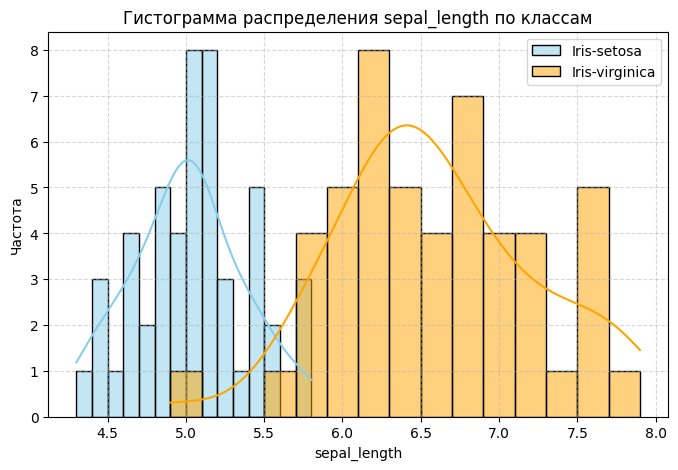

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=data_new[data_new['class'] == 'Iris-setosa'],
             x='sepal_length', bins=15, color='skyblue', label='Iris-setosa', kde=True)
sns.histplot(data=data_new[data_new['class'] == 'Iris-virginica'],
             x='sepal_length', bins=15, color='orange', label='Iris-virginica', kde=True)

plt.title('Гистограмма распределения sepal_length по классам')
plt.xlabel('sepal_length')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


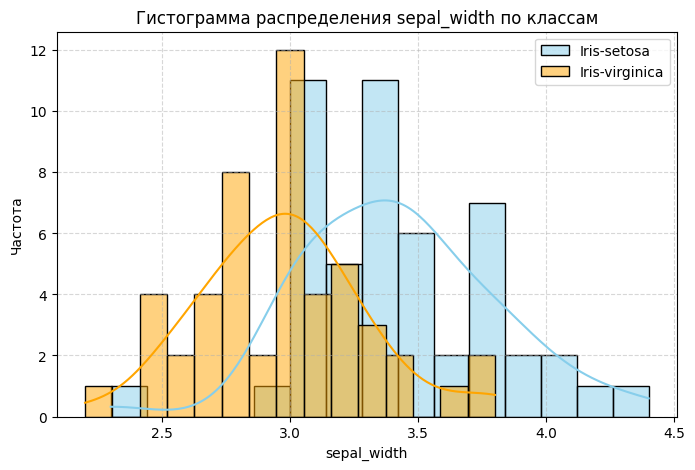

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data_new[data_new['class'] == 'Iris-setosa'],
             x='sepal_width', bins=15, color='skyblue', label='Iris-setosa', kde=True)
sns.histplot(data=data_new[data_new['class'] == 'Iris-virginica'],
             x='sepal_width', bins=15, color='orange', label='Iris-virginica', kde=True)

plt.title('Гистограмма распределения sepal_width по классам')
plt.xlabel('sepal_width')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

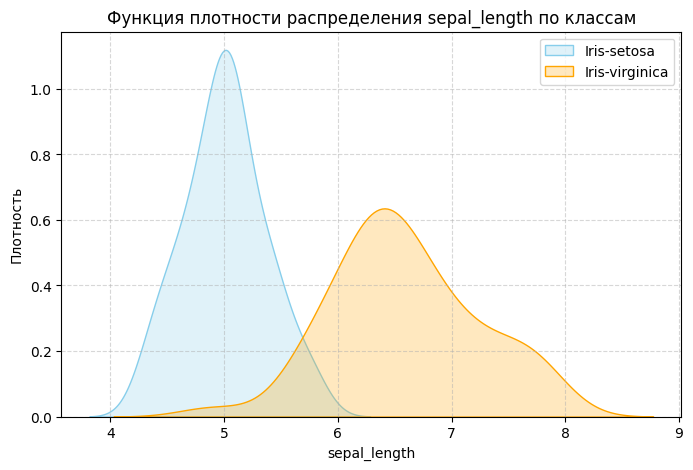

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(data=data_new[data_new['class'] == 'Iris-setosa'],
            x='sepal_length', fill=True, color='skyblue', label='Iris-setosa')

sns.kdeplot(data=data_new[data_new['class'] == 'Iris-virginica'],
            x='sepal_length', fill=True, color='orange', label='Iris-virginica')

plt.title('Функция плотности распределения sepal_length по классам')
plt.xlabel('sepal_length')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


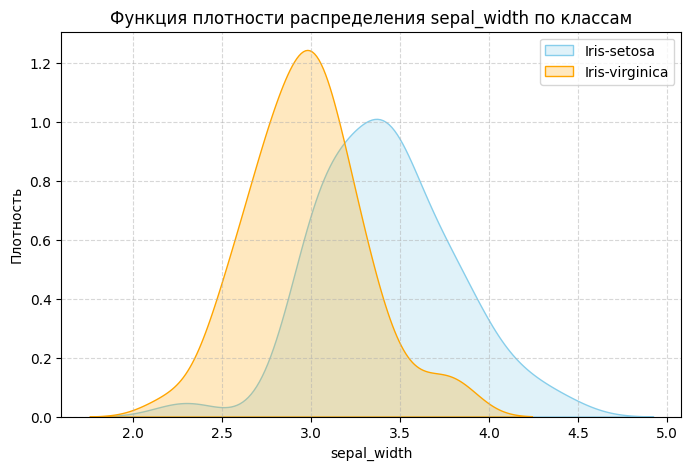

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(data=data_new[data_new['class'] == 'Iris-setosa'],
            x='sepal_width', fill=True, color='skyblue', label='Iris-setosa')

sns.kdeplot(data=data_new[data_new['class'] == 'Iris-virginica'],
            x='sepal_width', fill=True, color='orange', label='Iris-virginica')

plt.title('Функция плотности распределения sepal_width по классам')
plt.xlabel('sepal_width')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


<ipython-input-22-b5c072b14ef2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_new, x='class', y='sepal_length', palette='pastel')


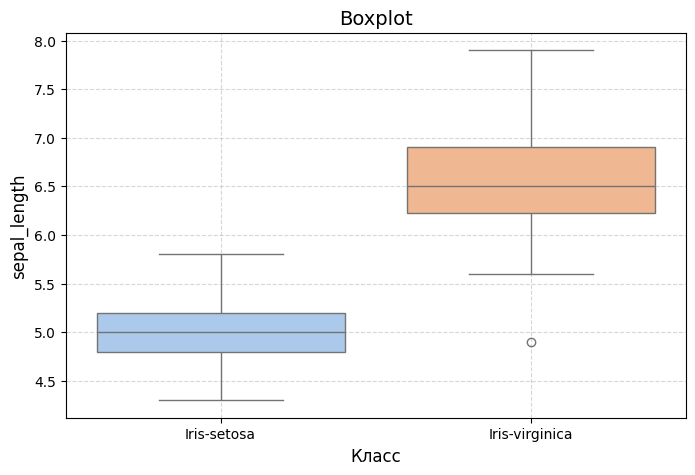

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=data_new, x='class', y='sepal_length', palette='pastel')

plt.title('Boxplot', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('sepal_length', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<ipython-input-32-dfca7f12007a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_new, x='class', y='sepal_width', palette='pastel')


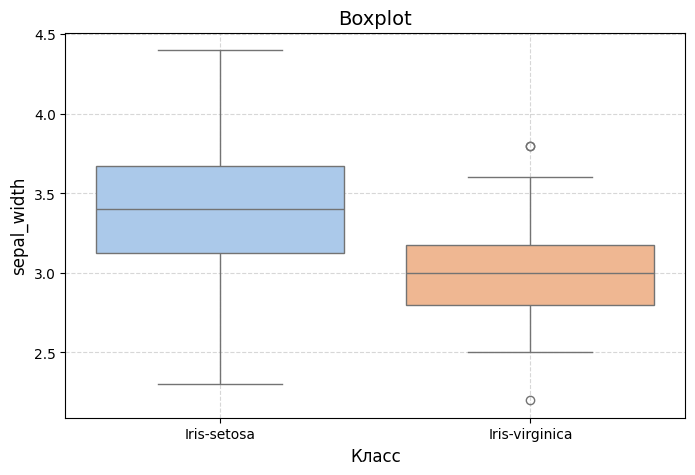

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=data_new, x='class', y='sepal_width', palette='pastel')

plt.title('Boxplot', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('sepal_width', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Постановка гипотез_1:
 H0: Данные распределены нормально

 H1: Данные не распределены нормально

 Результат проверки нормальности распределения с помощью критерия Шапиро-Уилка:

p = 0.004 < 0.05 → отвергаем H0.

 Признак не распределён нормально.

In [ ]:
import scipy.stats as stats

sepal_length_data = data_new['sepal_length']
stat, p = stats.shapiro(sepal_length_data)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Признак "sepal_length" распределён нормально')
else:
    print('Признак "sepal_length" не распределён нормально')



0.9455555004141006 0.00042770118095666784
Признак "sepal_length" не распределён нормально


### Постановка гипотез_2:
 H0: группы имеют равную дисперсию.

 H1: одна группа имеет иную дисперсию по сравнению с другими.

Результат проверки гомогенности дисперсий (критерий Бартлетта):

H0: Дисперсии равны.

p = 6.378941946712554e-05 < 0.05 → отвергаем H0. Дисперсии различаются.

In [ ]:
group1 = data_new[data_new['class'] == 'Iris-setosa']['sepal_length']
group2 = data_new[data_new['class'] == 'Iris-virginica']['sepal_length']

stat, p = stats.bartlett(group1, group2)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')


15.986688885110748 6.378941946712554e-05
Дисперсии не равны


## Постановка гипотез_3a:
 H0: Средние значения признака "sepal_length" в двух группах равны

 H1: Средние значения различаются

Результат теста Стьюдента для двух независимых выборок:

p = 6.892546060674059e-28 < 0.05 → отвергаем H0. Средние различаются.

In [ ]:
group1 = data_new[data_new['class'] == 'Iris-setosa']['sepal_length']
group2 = data_new[data_new['class'] == 'Iris-virginica']['sepal_length']

stat, p = stats.ttest_ind(group1, group2)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Средние значения одинаковы')
else:
    print('Средние значения различаются')


-15.386195820079404 6.892546060674059e-28
Средние значения различаются


## Постановка гипотез_3b:

H0: Средние значений двух зависимых признаков равны

 H1: Средние значения различаются

 Результат теста:

p = 3.209765141492149e-42 < 0.05 → отвергаем H0. Средние значения различаются.

In [ ]:
group1 = data_new['sepal_length']
group2 = data_new['sepal_width']

stat, p = stats.ttest_rel(group1, group2)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Средние значения одинаковы')
else:
    print('Средние значения различаются')


23.45821685374634 3.209765141492149e-42
Средние значения различаются
